In [1]:
import tp3
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

In [2]:
data = pd.read_csv('../data/synthData.csv',usecols=['Y', 'X1', 'X2', 'X3'])


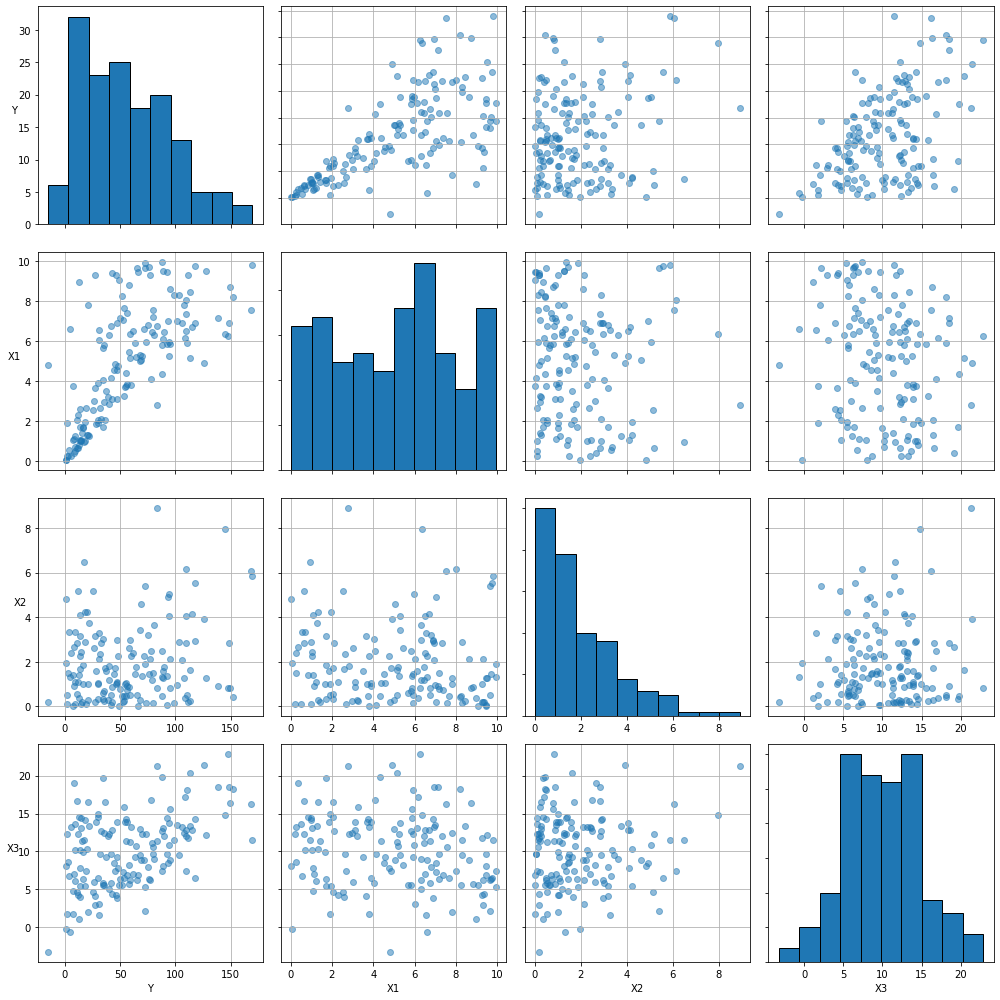

In [3]:
Y = data['Y']
X1 = data['X1']
X2 = data['X2']
X3 = data['X3']

figure, axis = plt.subplots(4, 4, figsize=(14, 14))

axis[0, 0].hist(Y, 10, edgecolor='k')
axis[0, 0].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 0].set_ylabel('Y', rotation=0)

axis[0, 1].scatter(X1, Y, alpha=0.5)
axis[0, 1].grid(True)
axis[0, 1].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 1].tick_params(axis='y', which='both', labelleft=False)

axis[0, 2].scatter(X2, Y, alpha=0.5)
axis[0, 2].grid(True)
axis[0, 2].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 2].tick_params(axis='y', which='both', labelleft=False)

axis[0, 3].scatter(X3, Y, alpha=0.5)
axis[0, 3].grid(True)
axis[0, 3].tick_params(axis='x', which='both', labelbottom=False)
axis[0, 3].tick_params(axis='y', which='both', labelleft=False)

#
axis[1, 0].scatter(Y, X1, alpha=0.5)
axis[1, 0].grid(True)
axis[1, 0].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 0].set_ylabel('X1', rotation=0)

axis[1, 1].hist(X1, 10, edgecolor='k')
axis[1, 1].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 1].tick_params(axis='y', which='both', labelleft=False)

axis[1, 2].scatter(X2, X1, alpha=0.5)
axis[1, 2].grid(True)
axis[1, 2].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 2].tick_params(axis='y', which='both', labelleft=False)

axis[1, 3].scatter(X3, X1, alpha=0.5)
axis[1, 3].grid(True)
axis[1, 3].tick_params(axis='x', which='both', labelbottom=False)
axis[1, 3].tick_params(axis='y', which='both', labelleft=False)

#
axis[2, 0].scatter(Y, X2, alpha=0.5)
axis[2, 0].grid(True)
axis[2, 0].set_ylabel('X2', rotation=0)

axis[2, 1].scatter(X1, X2, alpha=0.5)
axis[2, 1].grid(True)
axis[2, 1].tick_params(axis='y', which='both', labelleft=False)

axis[2, 2].hist(X2, 10, edgecolor='k')
axis[2, 2].tick_params(axis='y', which='both', labelleft=False)

axis[2, 3].scatter(X3, X2, alpha=0.5)
axis[2, 3].grid(True)
axis[2, 3].tick_params(axis='y', which='both', labelleft=False)

axis[3, 0].scatter(Y, X3, alpha=0.5)
axis[3, 0].grid(True)
axis[3, 0].set_ylabel('X3', rotation=0)
axis[3, 0].set_xlabel('Y')

axis[3, 1].scatter(X1, X3, alpha=0.5)
axis[3, 1].grid(True)
axis[3, 1].tick_params(axis='y', which='both', labelleft=False)
axis[3, 1].set_xlabel('X1')

axis[3, 2].scatter(X2, X3, alpha=0.5)
axis[3, 2].grid(True)
axis[3, 2].tick_params(axis='y', which='both', labelleft=False)
axis[3, 2].set_xlabel('X2')

axis[3, 3].hist(X3, 10, edgecolor='k')
axis[3, 3].tick_params(axis='y', which='both', labelleft=False)
axis[3, 3].set_xlabel('X3')

plt.tight_layout()
plt.show()

In [4]:
def estimate(f, degree, dist):
    x = data[['X1', 'X2', 'X3']].to_numpy()
    y = data['Y'].to_numpy()

    estimates = tp3.loess(x, y, f, degree, dist)
    return (y, estimates)

In [10]:
def probplot(estimates, residuals, param_f, poly_degree, param_dist):
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    plt.tight_layout()
    res = stats.probplot(residuals, plot=plt, fit=True)

    metodo = 'linear regression' if poly_degree == 1 else 'quadratic regression'
    axs[1].get_lines()[0].set_marker('o')
    axs[1].get_lines()[0].set_alpha(0.5)
    axs[1].set_ylabel('Residuals')
    axs[1].grid(True)
    axs[1].set_title(f'Probability Plot: {metodo}, f = {param_f}, dist=norm{param_dist}')

    abs_res_f = 0.2
    abs_res= np.abs(residuals)
    abs_res_est = tp3.loess(estimates.reshape((len(estimates),1)), abs_res, f=abs_res_f, fit=poly_degree, dist=param_dist, normalize=False)

    order_estimates = np.argsort(estimates)

    axs[0].scatter(estimates, abs_res, alpha=0.5)
    axs[0].plot(estimates[order_estimates], abs_res_est[order_estimates], color='red')
    axs[0].set_xlabel('Fitted Values')
    axs[0].set_ylabel('Abs Residuals')
    axs[0].grid(True)
    axs[0].set_title(f'{metodo}, f = {abs_res_f}, dist=norm{param_dist}')

In [8]:
def plot_residuals(residuals, f, degree, dist):
    cols = ['X1','X2', 'X3']

    metodo = 'linear regression' if degree == 1 else 'quadratic regression'
    fig, axs = plt.subplots(1, len(cols), figsize=(15,5))
    fig.suptitle(f'{metodo}, f = {f}, dist=norm{dist}')

    plt.tight_layout()
    axs[0].set_ylabel('Residuals')
    axs[1].tick_params(axis='y', which='both', labelleft=False)
    axs[2].tick_params(axis='y', which='both', labelleft=False)

    for i in range(len(cols)):
        x = data[[cols[i]]].to_numpy()
        res_est = tp3.loess(x, residuals, f, fit=degree, dist=dist, normalize=False)
        order = np.argsort(x.T[0])

        axs[i].scatter(x, residuals, alpha=0.5)
        axs[i].plot(x[order], res_est[order], color='red')
        axs[i].set_xlabel(cols[i])
        axs[i].grid(True)

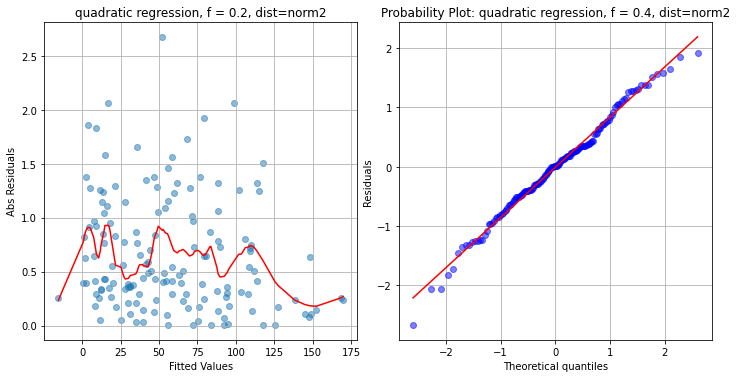

In [13]:
estimates, y = estimate(f=0.4, degree=2, dist=2)
residuals = y - estimates
probplot(estimates, residuals, 0.4, 2, 2)

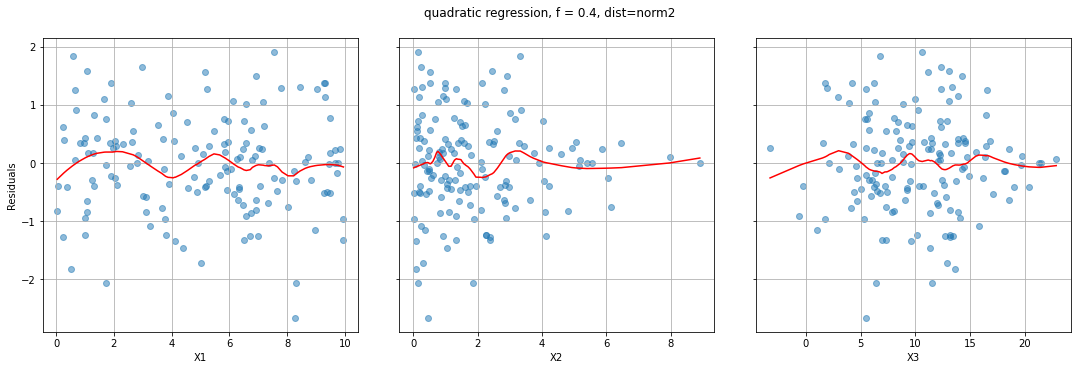

In [14]:
plot_residuals(residuals, 0.4, 2, 2)

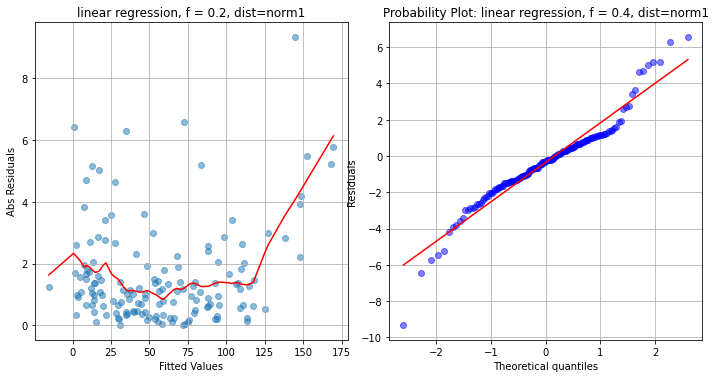

In [15]:
estimates, y = estimate(0.4, 1, 1)
residuals = y - estimates
probplot(estimates, residuals, 0.4, 1, 1)

In [ ]:
plot_residuals(residuals, 0.4, 1, 1)